# OpenStreetMap (OSM) data for Podgorica, Montenegro

In [9]:
# Loading of packages required for this Notebook

%pip install quackosm folium matplotlib mapclassify ipywidgets --quiet

Note: you may need to restart the kernel to use updated packages.


## Upotreba QuackOSM za pronalažanje i download podataka sa OSM

### Biblioteka komunicira sa provajderima OSM podataka kao sto su geofabrik.de i preuzima PBF fajlove 

Prvo je potrebno zadati gemetriju koja se pretražuje u OSM podacima. Postoji više načina za ovaj korak a najpopularnija su ova dva:
1. Ručno zadavanje koordinata geometrije
2. Dobijanje geometrije na osnovu nekog pojma ili naziva

U našem slučaju izabrali smo pristup br.2, pretragu za Glavni grad Podgorica.

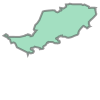

In [7]:
import quackosm as qosm

# Finding geometry of Podgorica
area_podgorica = qosm.geocode_to_geometry("Capital Podgorica, Montenegro")
area_podgorica # Display found geometry


Nakon što imamo željenu geometriju, možemo iskoristi QuackOSM biblioteku da pronađemo PBF ekstrakte koji pokrivaju ovu geometriju.
U nekim slučajevima zadana geometrija nije pokrivena samo jednim PBF ekstraktom, mora se spustiti više fajlova. U našem slučaju geometrija za Glavni grad podgorica je pokrivena jednim fajlom (https://download.geofabrik.de/europe/montenegro.html)

In [4]:
montenegro_pbf_url = "https://download.geofabrik.de/europe/montenegro-latest.osm.pbf"
montenegro_pbf_file = "montenegro.osm.pbf"

In [ ]:
# Find suitable PBF file(s) of OSM that covers Podgorica geometry 
# And filter out OSM features only for that area
# And load in GeoDataFrame

import urllib.request
import quackosm as qosm

urllib.request.urlretrieve(montenegro_pbf_url, montenegro_pbf_file)

Output()

Finished operation in 0:00:13

,tags,geometry
feature_id,,
node/2764090207,{'name': 'Alarmautomatika d.o.o.'},POINT (19.27915 42.43497)
node/2784462082,"{'side': 'right', 'traffic_sign:forward': 'RS:...",POINT (19.20366 42.41513)
node/2968259624,"{'name': 'Masline', 'name:sr': 'Маслине', 'pla...",POINT (19.28614 42.44427)
node/2968259625,"{'name': 'Stara varoš', 'name:sr': 'Стара варо...",POINT (19.26021 42.43549)
node/2968259626,"{'name': 'Drač', 'name:sr': 'Драч', 'place': '...",POINT (19.26602 42.43542)
...,...,...
way/1053308771,{'building': 'yes'},"POLYGON ((19.46225 42.53762, 19.46229 42.53764..."
way/1053308772,{'building': 'yes'},"POLYGON ((19.46206 42.53673, 19.46211 42.53675..."
way/1053308773,{'building': 'yes'},"POLYGON ((19.46696 42.53777, 19.46706 42.53779..."


In [8]:
gdf = qosm.convert_pbf_to_geodataframe(montenegro_pbf_file, geometry_filter=area_podgorica)
gdf.head() # Show sample from downloaded and extracted GeoDataFrame

,tags,geometry
feature_id,,
node/2764090207,{'name': 'Alarmautomatika d.o.o.'},POINT (19.27915 42.43497)
node/2784462082,"{'side': 'right', 'traffic_sign:forward': 'RS:...",POINT (19.20366 42.41513)
node/2968259624,"{'name': 'Masline', 'name:sr': 'Маслине', 'pla...",POINT (19.28614 42.44427)
node/2968259625,"{'name': 'Stara varoš', 'name:sr': 'Стара варо...",POINT (19.26021 42.43549)
node/2968259626,"{'name': 'Drač', 'name:sr': 'Драч', 'place': '...",POINT (19.26602 42.43542)


#### Vizuelna provjera ekstrakovanih podataka 

Upoređujemo geometrije za Podgoricu, granicama pokrivenim u PBF fajlu i na kraju ekstraktovanim OSM objektima za zadatu regiju

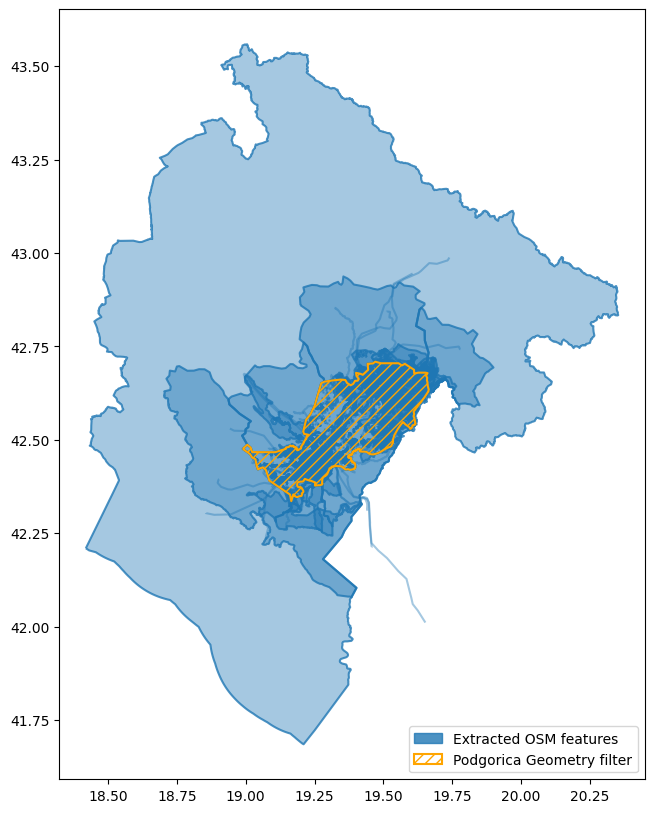

In [10]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd

fig = plt.figure(figsize=(10, 10))
ax = fig.subplots()

gdf.plot(ax=ax, markersize=1, zorder=1, alpha=0.4)
gdf.boundary.plot(ax=ax, markersize=0, zorder=1, alpha=0.8)
gpd.GeoSeries([area_podgorica], crs=4326).plot(
    ax=ax,
    color=(0, 0, 0, 0),
    zorder=2,
    hatch="///",
    edgecolor="orange",
    linewidth=1.5,
    
)

blue_patch = mpatches.Patch(color="C0", alpha=0.8, label="Extracted OSM features")
orange_patch = mpatches.Patch(
    facecolor=(0, 0, 0, 0), edgecolor="orange", hatch="///", linewidth=1.5, label="Podgorica Geometry filter"
)
ax.legend(handles=[blue_patch, orange_patch], loc="lower right")
plt.show()

### Provjera dostupnosti podataka vezanih za institucije obrazovanja u Podgorici

In [21]:
import quackosm as qosm

filter_kindergarten ={"amenity": "kindergarten"}
filter_school ={"amenity": "school"}
filter_university ={"amenity": "university"}

# Convert OSM features of Kindergarten, School and University to Parquet files
kindergarten_parquet = qosm.convert_pbf_to_parquet(
    pbf_path=montenegro_pbf_file,
    result_file_path="../data/kindergarten.parquet",
    tags_filter=filter_kindergarten,
    geometry_filter=area_podgorica,
    verbosity_mode="transient",
    ignore_cache=True,
    keep_all_tags=True,
    explode_tags=True
)

school_parquet = qosm.convert_pbf_to_parquet(
    pbf_path=montenegro_pbf_file,
    result_file_path="../data/school.parquet",
    tags_filter=filter_school,
    geometry_filter=area_podgorica,
    verbosity_mode="transient",
    ignore_cache=True,
    keep_all_tags=True,
    explode_tags=True
)

university_parquet = qosm.convert_pbf_to_parquet(
    pbf_path=montenegro_pbf_file,
    result_file_path="../data/university.parquet",
    tags_filter=filter_university,
    geometry_filter=area_podgorica,
    verbosity_mode="transient",
    ignore_cache=True,
    keep_all_tags=True,
    explode_tags=True
)

print("Kindergarten file: ", kindergarten_parquet)
print("School file: ", school_parquet)
print("University file: ", university_parquet)



Output()

Finished operation in 0:00:11

Output()

Finished operation in 0:00:11

Output()

Finished operation in 0:00:12

Kindergarten file:  ../data/kindergarten.parquet
School file:  ../data/school.parquet
University file:  ../data/university.parquet


### Provjera OSM podataka za javni prevoz na teritoriji podgorice



#### Autobuska stajalista

In [ ]:
import quackosm as qosm

filter_bus_stop ={"highway": "bus_stop"}

# Convert OSM features of bus stops to Parquet files
bus_stop_parquet = qosm.convert_pbf_to_parquet(
    pbf_path=montenegro_pbf_file,
    result_file_path="../data/bus_stop.parquet",
    tags_filter=filter_bus_stop,
    geometry_filter=area_podgorica,
    verbosity_mode="transient",
    ignore_cache=True,
    keep_all_tags=True,
    explode_tags=True
)


#### Linije gradskog prevoza

QuackOSM biblioteka ne podržava ekstrakciju linija gradskog prevoza, jer su zadate kao OSM objekat tipa *relacija*.

Ovdje smo primijenili DuckDB biblioteku sa Spatial ekstenzijom koja jednostavno učitava PBF fajl i daje rezultate u DataFrame.

In [15]:
import duckdb
import geopandas
import quackosm as qosm

# Using DuckDB load bus routes
duckdb.load_extension("spatial")

bus_routes_unnested = duckdb.sql(
    f"""
    SELECT
        id,
        tags as route_tags,
        UNNEST(refs) as ref,
        UNNEST(ref_types) as ref_type,
        UNNEST(ref_roles) as ref_role
    FROM ST_ReadOSM('{montenegro_pbf_file}')
    WHERE kind = 'relation'
    AND tags['route'][1] = 'bus'
    """
).to_df()

# Combine the data in one object
bus_routes_unnested["feature_id"] = (
    bus_routes_unnested["ref_type"].astype(str) + "/" + bus_routes_unnested["ref"].astype(str)
)

# Load highway and public_transport features
highway_filter = {"highway": True, "public_transport": True}

features_gdf = qosm.convert_pbf_to_geodataframe(pbf_path=montenegro_pbf_file, tags_filter=highway_filter, keep_all_tags=True, geometry_filter=area_podgorica, verbosity_mode="transient")



bus_routes_with_geometries = bus_routes_unnested.merge(features_gdf, left_on="feature_id", right_index=True)
bus_routes_with_geometries = bus_routes_with_geometries.rename(
    columns={
        "id": "relation_route_id",
        "tags": "feature_tags",
    }
)



gdf = geopandas.GeoDataFrame(bus_routes_with_geometries, geometry="geometry", crs=4326)
#gpd.GeoSeries([area_podgorica], crs=4326).boundary.explore(m=gdf.explore(color="orangered", tiles="CartoDB positron"))



#features_gdf.head
bus_routes_with_geometries.head()

,relation_route_id,route_tags,ref,ref_type,ref_role,feature_id,feature_tags,geometry
0,2107991,"{'name': 'Podgorica - Plav', 'operator': 'Elan...",152579612,way,None,way/152579612,"{'access': 'private', 'highway': 'service', 'h...","LINESTRING (19.26735 42.43185, 19.26809 42.431..."
1,2107991,"{'name': 'Podgorica - Plav', 'operator': 'Elan...",1028505396,way,None,way/1028505396,"{'bicycle': 'yes', 'foot': 'yes', 'highway': '...","LINESTRING (19.2672 42.4323, 19.26732 42.43248)"
2,2107991,"{'name': 'Podgorica - Plav', 'operator': 'Elan...",1028505395,way,None,way/1028505395,"{'bicycle': 'yes', 'foot': 'yes', 'highway': '...","LINESTRING (19.26732 42.43248, 19.26748 42.432..."
3,2107991,"{'name': 'Podgorica - Plav', 'operator': 'Elan...",27529365,way,None,way/27529365,"{'bicycle': 'yes', 'foot': 'yes', 'highway': '...","LINESTRING (19.26758 42.4329, 19.26762 42.4329..."
4,2107991,"{'name': 'Podgorica - Plav', 'operator': 'Elan...",1040557017,way,None,way/1040557017,"{'highway': 'tertiary', 'lanes': '3', 'lanes:b...","LINESTRING (19.26775 42.43345, 19.26776 42.433..."


## Analiza pokrivenosti obrazovnih institucija gradskim prevozom

TODO: Različiti metodi analize 

## Vizuelizicija podataka i priprema podataka za dalju upotrebu

TODO: Istražiti različite metode vizualizacije
TODO: Istražiti metode exporta, i omugužavanja pristupa podacima za druge upotrebe.

In [ ]:
%pip install streamlit --quiet
import streamlit as st
#import leafmap.foliumap as leafmap
import geopandas as gpd
import json

m = leafmap.Map(tiles="Stadia.AlidadeSmoothDark")

m.zoom_to_bounds((18.9894022, 42.3356869, 19.6647575, 42.7089575))

url = "webapp/data/osm.kindergarten.20241104.parquet"
gdf_kindergarten = gpd.read_parquet(url)
gdf_kindergarten = gdf_kindergarten.to_crs("EPSG:4326")
gdf_kindergarten = gdf_kindergarten[gdf_kindergarten["amenity"] == "kindergarten"]
gdf_kindergarten = gdf_kindergarten[["name", "geometry"]]
gdf_kindergarten["centroid"] = gdf_kindergarten.geometry.centroid
#gdf_kindergarten["geometry"] = gdf_kindergarten.centroid
gdf_kindergarten.explore(color="red", radius=250)

Note: you may need to restart the kernel to use updated packages.
